In [3]:
import pandas as pd
from nltk.corpus import stopwords
import numpy as np
from string import punctuation
import re
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, LSTM, Flatten
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
df = pd.read_csv('../IMDB_dataset/IMDB dataset.csv')

In [4]:
review_len = pd.Series([len(review.split()) for review in df['review']])

<Axes: xlabel='Length of sentence', ylabel='Count'>

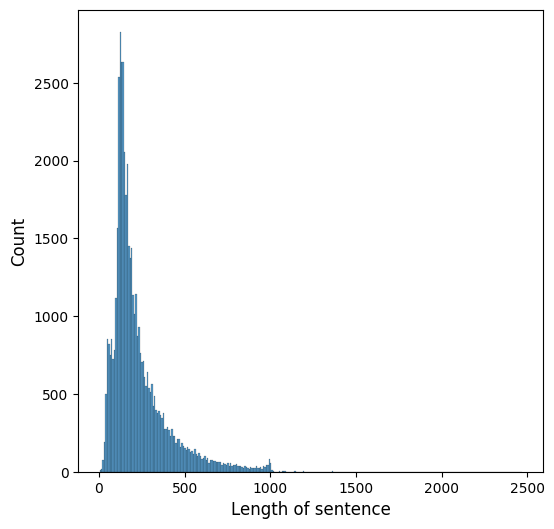

In [5]:
plt.figure(figsize = (6,6))
plt.xlabel("Length of sentence", fontsize=12)  
plt.ylabel("Count", fontsize=12)
sns.histplot(review_len)

In [6]:
all_reviews_count = review_len.size
all_reviews_count

50000

### Determining how many % of sentences have less words than the specified threshold

In [7]:
has_less_words_than_threshold_count = 0
threshold = 595
for words_count in review_len:
    if words_count < threshold:
        has_less_words_than_threshold_count += 1

print(has_less_words_than_threshold_count/all_reviews_count *100, "%")


95.104 %


In [4]:
df.sentiment.replace("positive", 1, inplace = True)
df.sentiment.replace("negative", 0, inplace = True)

In [5]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

x_train, y_train = train['review'], train['sentiment']
x_test, y_test = test['review'], test['sentiment']
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                             test_size=0.2, random_state=10)

In [6]:
tokenizer = Tokenizer(oov_token="OOV")

In [7]:
tokenizer.fit_on_texts(x_train)
word_index = tokenizer.word_index

In [8]:
print('%s unique tokens.' % len(word_index))

101592 unique tokens.


In [9]:
sequences = tokenizer.texts_to_sequences(x_train)

In [10]:
max_len = 595
trunc_type = 'post'
oov_tok = 'OOV'
padding_type = 'post'
vocab_size = len(word_index) + 1

In [11]:
train_padded = pad_sequences(sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

test_sentences = tokenizer.texts_to_sequences(x_test)
test_padded = pad_sequences(test_sentences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

val_sentences = tokenizer.texts_to_sequences(x_val)
val_padded = pad_sequences(val_sentences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

### Changing embedding dim

In [17]:
embedding_dim = 200

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 595, 200)          20318600  
                                                                 
 dropout (Dropout)           (None, 595, 200)          0         
                                                                 
 lstm (LSTM)                 (None, 595, 64)           67840     
                                                                 
 flatten (Flatten)           (None, 38080)             0         
                                                                 
 dense (Dense)               (None, 1)                 38081     
                                                                 
Total params: 20,424,521
Trainable params: 20,424,521
Non-trainable params: 0
_________________________________________________________________


In [18]:
batch_size = 4
num_epochs = 2

In [19]:
history = model.fit(train_padded, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(val_padded, y_val))

Epoch 1/2
8000/8000 [==============================] - 434s 53ms/step - loss: 0.3313 - accuracy: 0.8584 - val_loss: 0.2695 - val_accuracy: 0.8925
Epoch 2/2
8000/8000 [==============================] - 423s 53ms/step - loss: 0.1033 - accuracy: 0.9632 - val_loss: 0.3647 - val_accuracy: 0.8824


In [20]:
model.evaluate(test_padded, y_test)

313/313 [==============================] - 5s 13ms/step - loss: 0.3509 - accuracy: 0.8835


[0.3509092628955841, 0.8834999799728394]

In [29]:
embedding_dim = 300

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 595, 300)          30477900  
                                                                 
 dropout_3 (Dropout)         (None, 595, 300)          0         
                                                                 
 lstm_3 (LSTM)               (None, 595, 64)           93440     
                                                                 
 flatten_3 (Flatten)         (None, 38080)             0         
                                                                 
 dense_3 (Dense)             (None, 1)                 38081     
                                                                 
Total params: 30,609,421
Trainable params: 30,609,421
Non-trainable params: 0
_________________________________________________________________


In [30]:
history = model.fit(train_padded, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(val_padded, y_val))

Epoch 1/2
8000/8000 [==============================] - 576s 71ms/step - loss: 0.3258 - accuracy: 0.8611 - val_loss: 0.2789 - val_accuracy: 0.8919
Epoch 2/2
8000/8000 [==============================] - 564s 70ms/step - loss: 0.0950 - accuracy: 0.9658 - val_loss: 0.3648 - val_accuracy: 0.8824


In [31]:
model.evaluate(test_padded, y_test)

313/313 [==============================] - 9s 13ms/step - loss: 0.3499 - accuracy: 0.8852


[0.3498815596103668, 0.885200023651123]

In [21]:
embedding_dim = 400

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 595, 400)          40637200  
                                                                 
 dropout_1 (Dropout)         (None, 595, 400)          0         
                                                                 
 lstm_1 (LSTM)               (None, 595, 64)           119040    
                                                                 
 flatten_1 (Flatten)         (None, 38080)             0         
                                                                 
 dense_1 (Dense)             (None, 1)                 38081     
                                                                 
Total params: 40,794,321
Trainable params: 40,794,321
Non-trainable params: 0
_________________________________________________________________


In [22]:
batch_size = 4
num_epochs = 2

In [23]:
history = model.fit(train_padded, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(val_padded, y_val))

Epoch 1/2
8000/8000 [==============================] - 716s 89ms/step - loss: 0.3299 - accuracy: 0.8616 - val_loss: 0.2661 - val_accuracy: 0.8956
Epoch 2/2
8000/8000 [==============================] - 699s 87ms/step - loss: 0.0903 - accuracy: 0.9678 - val_loss: 0.3788 - val_accuracy: 0.8737


In [24]:
model.evaluate(test_padded, y_test)

313/313 [==============================] - 6s 17ms/step - loss: 0.3586 - accuracy: 0.8790


[0.3585589826107025, 0.8790000081062317]

In [16]:
embedding_dim = 500

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 595, 500)          50796500  
                                                                 
 dropout (Dropout)           (None, 595, 500)          0         
                                                                 
 lstm (LSTM)                 (None, 595, 64)           144640    
                                                                 
 flatten (Flatten)           (None, 38080)             0         
                                                                 
 dense (Dense)               (None, 1)                 38081     
                                                                 
Total params: 50,979,221
Trainable params: 50,979,221
Non-trainable params: 0
_________________________________________________________________


In [17]:
batch_size = 2
num_epochs = 1

In [18]:
history = model.fit(train_padded, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(val_padded, y_val))

16000/16000 [==============================] - 1658s 103ms/step - loss: 0.3409 - accuracy: 0.8579 - val_loss: 0.2678 - val_accuracy: 0.8954


### Changing LSTM units

In [25]:
embedding_dim = 200

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=True))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 595, 200)          20318600  
                                                                 
 dropout_2 (Dropout)         (None, 595, 200)          0         
                                                                 
 lstm_2 (LSTM)               (None, 595, 128)          168448    
                                                                 
 flatten_2 (Flatten)         (None, 76160)             0         
                                                                 
 dense_2 (Dense)             (None, 1)                 76161     
                                                                 
Total params: 20,563,209
Trainable params: 20,563,209
Non-trainable params: 0
_________________________________________________________________


In [26]:
batch_size = 4
num_epochs = 2

In [27]:
history = model.fit(train_padded, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(val_padded, y_val))

Epoch 1/2
8000/8000 [==============================] - 452s 55ms/step - loss: 0.3336 - accuracy: 0.8560 - val_loss: 0.2726 - val_accuracy: 0.8900
Epoch 2/2
8000/8000 [==============================] - 446s 56ms/step - loss: 0.1057 - accuracy: 0.9615 - val_loss: 0.3728 - val_accuracy: 0.8842


In [28]:
model.evaluate(test_padded, y_test)

313/313 [==============================] - 9s 17ms/step - loss: 0.3571 - accuracy: 0.8809


[0.35707157850265503, 0.8809000253677368]

In [12]:
embedding_dim = 400

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=True))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 595, 400)          40637200  
                                                                 
 dropout (Dropout)           (None, 595, 400)          0         
                                                                 
 lstm (LSTM)                 (None, 595, 128)          270848    
                                                                 
 flatten (Flatten)           (None, 76160)             0         
                                                                 
 dense (Dense)               (None, 1)                 76161     
                                                                 
Total params: 40,984,209
Trainable params: 40,984,209
Non-trainable params: 0
_________________________________________________________________


In [14]:
batch_size = 4
num_epochs = 1

In [15]:
history = model.fit(train_padded, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(val_padded, y_val))

8000/8000 [==============================] - 752s 93ms/step - loss: 0.3332 - accuracy: 0.8589 - val_loss: 0.2754 - val_accuracy: 0.8931


### Changing dropout

In [16]:
embedding_dim = 400

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(Dropout(0.3))
model.add(LSTM(128, return_sequences=True))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 595, 400)          40637200  
                                                                 
 dropout_1 (Dropout)         (None, 595, 400)          0         
                                                                 
 lstm_1 (LSTM)               (None, 595, 128)          270848    
                                                                 
 flatten_1 (Flatten)         (None, 76160)             0         
                                                                 
 dense_1 (Dense)             (None, 1)                 76161     
                                                                 
Total params: 40,984,209
Trainable params: 40,984,209
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(train_padded, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(val_padded, y_val))

8000/8000 [==============================] - 745s 93ms/step - loss: 0.3373 - accuracy: 0.8565 - val_loss: 0.2796 - val_accuracy: 0.8925


In [18]:
model.evaluate(test_padded, y_test)

313/313 [==============================] - 12s 21ms/step - loss: 0.2722 - accuracy: 0.8917


[0.2722209095954895, 0.891700029373169]

In [19]:
batch_size = 4
num_epochs = 1

In [20]:
embedding_dim = 400

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(Dropout(0.3))
model.add(LSTM(64, return_sequences=True))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 595, 400)          40637200  
                                                                 
 dropout_2 (Dropout)         (None, 595, 400)          0         
                                                                 
 lstm_2 (LSTM)               (None, 595, 64)           119040    
                                                                 
 flatten_2 (Flatten)         (None, 38080)             0         
                                                                 
 dense_2 (Dense)             (None, 1)                 38081     
                                                                 
Total params: 40,794,321
Trainable params: 40,794,321
Non-trainable params: 0
_________________________________________________________________


In [21]:
history = model.fit(train_padded, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(val_padded, y_val))

8000/8000 [==============================] - 718s 89ms/step - loss: 0.3247 - accuracy: 0.8635 - val_loss: 0.2882 - val_accuracy: 0.8909


In [22]:
model.evaluate(test_padded, y_test)

313/313 [==============================] - 10s 17ms/step - loss: 0.2828 - accuracy: 0.8829


[0.2827790677547455, 0.8828999996185303]

### With text preprocessing

In [8]:
def remove_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

In [5]:
stop = set(stopwords.words('english'))
punctuation = list(punctuation)
stop.update(punctuation)

In [6]:
def remove_punctuation_and_stopwords(text):
    output = []
    for word in word_tokenize(text.lower()):
        if word not in stop and word.isalpha():
            output.append(word)
    return " ".join(output)

In [7]:
def preprocess_text(text):
    text = remove_html(text)
    text = remove_punctuation_and_stopwords(text)
    return text

In [8]:
df = pd.read_csv('../IMDB_dataset/IMDB dataset.csv')

In [9]:
df['review'] = df['review'].apply(preprocess_text)

C:\Users\wojte\AppData\Local\Temp\ipykernel_1152\2518913060.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [10]:
df.sentiment.replace("positive", 1, inplace = True)
df.sentiment.replace("negative", 0, inplace = True)

In [11]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

x_train, y_train = train['review'], train['sentiment']
x_test, y_test = test['review'], test['sentiment']
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                             test_size=0.2, random_state=10)

In [12]:
tokenizer = Tokenizer(oov_token="OOV")

In [13]:
tokenizer.fit_on_texts(x_train)
word_index = tokenizer.word_index

In [14]:
sequences = tokenizer.texts_to_sequences(x_train)

In [15]:
max_len = 595
trunc_type = 'post'
oov_tok = 'OOV'
padding_type = 'post'
vocab_size = len(word_index) + 1

In [16]:
train_padded = pad_sequences(sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

test_sentences = tokenizer.texts_to_sequences(x_test)
test_padded = pad_sequences(test_sentences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

val_sentences = tokenizer.texts_to_sequences(x_val)
val_padded = pad_sequences(val_sentences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

In [17]:
embedding_dim = 400

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 595, 400)          32826800  
                                                                 
 dropout (Dropout)           (None, 595, 400)          0         
                                                                 
 lstm (LSTM)                 (None, 595, 64)           119040    
                                                                 
 flatten (Flatten)           (None, 38080)             0         
                                                                 
 dense (Dense)               (None, 1)                 38081     
                                                                 
Total params: 32,983,921
Trainable params: 32,983,921
Non-trainable params: 0
_________________________________________________________________


In [18]:
batch_size = 4
num_epochs = 1

In [19]:
history = model.fit(train_padded, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(val_padded, y_val))

8000/8000 [==============================] - 613s 76ms/step - loss: 0.3327 - accuracy: 0.8610 - val_loss: 0.2967 - val_accuracy: 0.8866


### With preprocess and words stem

In [6]:
stop = set(stopwords.words('english'))
punctuation = list(punctuation)
stop.update(punctuation)

In [21]:
def remove_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

In [22]:
def preprocess_text(text):
    text = remove_html(text)
    stem_tokens = []
    stemmer = PorterStemmer()
    for word in word_tokenize(text.lower()):
        if word not in stop and word.isalpha():
            stem_word = stemmer.stem(word)
            stem_tokens.append(stem_word)
    return " ".join(stem_tokens)

In [23]:
df = pd.read_csv('../IMDB_dataset/IMDB dataset.csv')

In [26]:
df['review'] = df['review'].apply(preprocess_text)

df.sentiment.replace("positive", 1, inplace = True)
df.sentiment.replace("negative", 0, inplace = True)

C:\Users\wojte\AppData\Local\Temp\ipykernel_1152\2518913060.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [27]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

x_train, y_train = train['review'], train['sentiment']
x_test, y_test = test['review'], test['sentiment']
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                             test_size=0.2, random_state=10)

In [28]:
tokenizer = Tokenizer(oov_token="OOV")

In [29]:
tokenizer.fit_on_texts(x_train)
word_index = tokenizer.word_index

In [30]:
sequences = tokenizer.texts_to_sequences(x_train)

In [31]:
max_len = 595
trunc_type = 'post'
oov_tok = 'OOV'
padding_type = 'post'
vocab_size = len(word_index) + 1

In [32]:
train_padded = pad_sequences(sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

test_sentences = tokenizer.texts_to_sequences(x_test)
test_padded = pad_sequences(test_sentences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

val_sentences = tokenizer.texts_to_sequences(x_val)
val_padded = pad_sequences(val_sentences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

In [33]:
embedding_dim = 400

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 595, 400)          22738000  
                                                                 
 dropout_1 (Dropout)         (None, 595, 400)          0         
                                                                 
 lstm_1 (LSTM)               (None, 595, 64)           119040    
                                                                 
 flatten_1 (Flatten)         (None, 38080)             0         
                                                                 
 dense_1 (Dense)             (None, 1)                 38081     
                                                                 
Total params: 22,895,121
Trainable params: 22,895,121
Non-trainable params: 0
_________________________________________________________________


In [34]:
history = model.fit(train_padded, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(val_padded, y_val))

8000/8000 [==============================] - 467s 58ms/step - loss: 0.3381 - accuracy: 0.8559 - val_loss: 0.2877 - val_accuracy: 0.8885


### Remove punctuation and html

In [4]:
def preprocess_text(text):
    text = remove_html(text)
    output = []
    for word in word_tokenize(text.lower()):
        if word.isalpha():
            output.append(word)
    return " ".join(output)

In [5]:
df = pd.read_csv('../IMDB_dataset/IMDB dataset.csv')

In [9]:
df['review'] = df['review'].apply(preprocess_text)

df.sentiment.replace("positive", 1, inplace = True)
df.sentiment.replace("negative", 0, inplace = True)

C:\Users\wojte\AppData\Local\Temp\ipykernel_3404\2518913060.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [10]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

x_train, y_train = train['review'], train['sentiment']
x_test, y_test = test['review'], test['sentiment']
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                             test_size=0.2, random_state=10)

In [11]:
tokenizer = Tokenizer(oov_token="OOV")

In [12]:
tokenizer.fit_on_texts(x_train)
word_index = tokenizer.word_index

In [13]:
sequences = tokenizer.texts_to_sequences(x_train)

In [14]:
max_len = 595
trunc_type = 'post'
oov_tok = 'OOV'
padding_type = 'post'
vocab_size = len(word_index) + 1

In [15]:
train_padded = pad_sequences(sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

test_sentences = tokenizer.texts_to_sequences(x_test)
test_padded = pad_sequences(test_sentences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

val_sentences = tokenizer.texts_to_sequences(x_val)
val_padded = pad_sequences(val_sentences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

In [16]:
embedding_dim = 400

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 595, 400)          32887200  
                                                                 
 dropout (Dropout)           (None, 595, 400)          0         
                                                                 
 lstm (LSTM)                 (None, 595, 64)           119040    
                                                                 
 flatten (Flatten)           (None, 38080)             0         
                                                                 
 dense (Dense)               (None, 1)                 38081     
                                                                 
Total params: 33,044,321
Trainable params: 33,044,321
Non-trainable params: 0
_________________________________________________________________


In [18]:
batch_size = 4
num_epochs = 1

In [19]:
history = model.fit(train_padded, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(val_padded, y_val))

8000/8000 [==============================] - 632s 78ms/step - loss: 0.3367 - accuracy: 0.8592 - val_loss: 0.2929 - val_accuracy: 0.8869
